In [57]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor, ceil # for rounding up and down
from scipy.stats import pearsonr
from sklearn import datasets
import pandas as pd
import math
from typing import Dict, Tuple, List
import copy

In [58]:
def Get_Class_Label_Of_Object(x):
    return x[len(x)-1]

def Distance(x, y):
    if len(x) != len(y):
        return -1
    
    sum = 0
    for i in range(len(x)):
        sum += (x[i]-y[i])*(x[i]-y[i])
        
    return sum

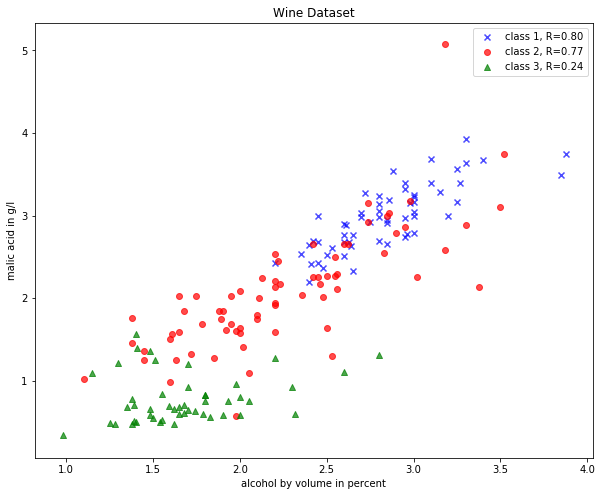

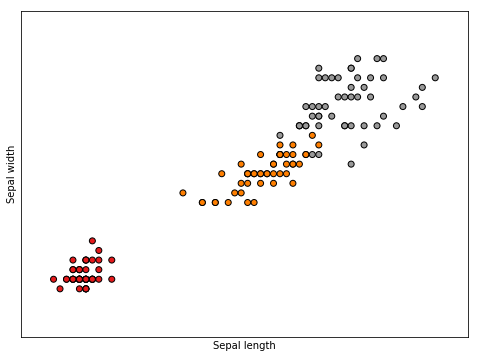

[[1.3999999999999999, 0.20000000000000001, 0], [1.3999999999999999, 0.20000000000000001, 0], [1.3, 0.20000000000000001, 0], [1.5, 0.20000000000000001, 0], [1.3999999999999999, 0.20000000000000001, 0], [1.7, 0.40000000000000002, 0], [1.3999999999999999, 0.29999999999999999, 0], [1.5, 0.20000000000000001, 0], [1.3999999999999999, 0.20000000000000001, 0], [1.5, 0.10000000000000001, 0], [1.5, 0.20000000000000001, 0], [1.6000000000000001, 0.20000000000000001, 0], [1.3999999999999999, 0.10000000000000001, 0], [1.1000000000000001, 0.10000000000000001, 0], [1.2, 0.20000000000000001, 0], [1.5, 0.40000000000000002, 0], [1.3, 0.40000000000000002, 0], [1.3999999999999999, 0.29999999999999999, 0], [1.7, 0.29999999999999999, 0], [1.5, 0.29999999999999999, 0], [1.7, 0.20000000000000001, 0], [1.5, 0.40000000000000002, 0], [1.0, 0.20000000000000001, 0], [1.7, 0.5, 0], [1.8999999999999999, 0.20000000000000001, 0], [1.6000000000000001, 0.20000000000000001, 0], [1.6000000000000001, 0.40000000000000002, 0]

In [59]:
def PrepareData():
    all_data = np.loadtxt(open("./wine_data.csv","r"), delimiter = ",", skiprows = 0, dtype = np.float64)

    # load class labels from column 1
    y_wine = all_data[:,0]
    #print (y_wine)
    # conversion of the class labels to integer-type array
    y_wine = y_wine.astype(np.int64, copy = False)

    # load the 14 features
    X_wine = all_data[:,1:]
    
    data = all_data[:, 6:8]   #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 6:9    
    
    from scipy.stats import pearsonr

    plt.figure(figsize=(10,8))

    for label,marker,color in zip(
            range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

        # Calculate Pearson correlation coefficient
        R = pearsonr(data[:,0][y_wine == label], data[:,1][y_wine == label])
        plt.scatter(x=data[:,0][y_wine == label], # x-axis: feat. from col. 1
                    y=data[:,1][y_wine == label], # y-axis: feat. from col. 2
                    marker=marker, # data point symbol for the scatter plot
                    color=color,
                    alpha=0.7,
                    label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                    )

    plt.title('Wine Dataset')
    plt.xlabel('alcohol by volume in percent')
    plt.ylabel('malic acid in g/l')
    plt.legend(loc='upper right')

    plt.show()
    
    
    
    w, h = 3, len(data)
    m = [[0 for x in range(w)] for y in range(h)] 

    for i in range(len(data)):
        for j in range(2):
            m[i][j] = data[i, j]
        m[i][2] = y_wine[i]-1
    data = m
    return data

data = PrepareData()



def Prepare_Iris_Data():
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn import datasets
    from sklearn.decomposition import PCA

    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:, 2:4]  # we only take the first two features.
    y = iris.target

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    plt.figure(2, figsize = (8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    
    w, h = 3, len(X)
    m = [[0 for x in range(w)] for y in range(h)] 

    for i in range(len(X)):
        for j in range(2):
            m[i][j] = X[i, j]
        m[i][2] = y[i]
    data = m
    return data

iris_data = Prepare_Iris_Data()
print (iris_data)


In [60]:
class FRiS_STOLP:

    def Get_Nearest_Neighbour(self, x, Omega):
        dist = [0]*len(Omega)

        for i in range(len(Omega)):
            dist[i] = Distance(x[0:len(x)-1], Omega[i][0:len(x)-1])

        min_dist = min(dist)

        for i in range(len(Omega)):
            if dist[i] == min_dist:
                return Omega[i]

    def FindEtalon(self, X, Omega, Xl, defence_to_tolerance_ratio):

        Efficiency = [0]*len(X)

        for i in range(len(X)):

            x = X[i]

            sum_of_defence = 0
            label = Get_Class_Label_Of_Object(x)

            for item in X: 
                if item != x and Get_Class_Label_Of_Object(item) == label:
                    nearest_neighbour_enemy = self.Get_Nearest_Neighbour(item, Omega)
                    S_nom = math.sqrt(Distance(item, x)) - math.sqrt(Distance(item, nearest_neighbour_enemy))
                    S_denom = math.sqrt(Distance(item, x)) + math.sqrt(Distance(item, nearest_neighbour_enemy))
                    S = S_nom / S_denom
                    sum_of_defence += S

            Defence = sum_of_defence / (len(X)-1)

            Tolerance_sum = 0
            Tolerance_denom = len(Omega)

            for item in X: 
                if Get_Class_Label_Of_Object(item) != label:
                    S_nom = math.sqrt(Distance(item, x)) - math.sqrt(Distance(item, nearest_neighbour_enemy))
                    S_denom = math.sqrt(Distance(item, x)) + math.sqrt(Distance(item, nearest_neighbour_enemy))
                    S = S_nom / S_denom
                    Tolerance_sum += S

            Tolerance = Tolerance_sum / Tolerance_denom

            Efficiency[i] = defence_to_tolerance_ratio * Defence + (1.0 - defence_to_tolerance_ratio) * Tolerance

        max_Efficiency = max(Efficiency)

        for i in range(len(X)):
            if Efficiency[i] == max_Efficiency:
                return X[i]



    def Get_Objects_From_Ith_Class(self, X, class_label):
        cnt = 0

     #   print (X)

        for i in range(len(X)):
            obj = X[i]

            if Get_Class_Label_Of_Object(obj) == class_label:
                cnt += 1

       # print (cnt)

        w, h = 4, cnt
        res = [[0 for x in range(w)] for y in range(h)] 

        cnt = 0

        for i in range(len(X)):
            obj = X[i]
            if Get_Class_Label_Of_Object(obj) == class_label:
                res[cnt] = obj
                cnt += 1

        return res

    # --------------------------------------------------------------

    def Get_Enemies_Of_Ith_Class(self, X, class_label):
        cnt = 0

        for i in range(len(X)):
            obj = X[i]
            if Get_Class_Label_Of_Object(obj) != class_label:
                cnt += 1

        w, h = 4, cnt
        res = [[0 for x in range(w)] for y in range(h)] 

        cnt = 0

        for i in range(len(X)):
            obj = X[i]
            if Get_Class_Label_Of_Object(obj) != class_label:
                res[cnt] = obj
                cnt += 1

        return res

    # --------------------------------------------------------------

    def Truncate_Set(self, X, Y):
        res = []
        for i in range(len(X)):
            is_exist = False

            for j in range(len(Y)):
                if X[i] == Y[j]:
                    is_exist = True
                    break

            if is_exist == False:
                res[len(res):]  = [X[i]]

        return res

    # --------------------------------------------------------------

    def Construct_A_Set_Of_Correctly_Classified_Objects(self, Xl, Etalons):
        res = []

        for i in range(len(Xl)):
            x = Xl[i]
            label_of_cur_class = Get_Class_Label_Of_Object(x)

            nearest_neighbour_friend = []
            nearest_neighbour_enemy = []

            Enemies_Etalons = copy.deepcopy(Etalons)
            del Enemies_Etalons[label_of_cur_class]
            Enemies_Etalons = self.Merge_Elements(Enemies_Etalons)
            
            nearest_neighbour_friend = self.Get_Nearest_Neighbour(x, Etalons[label_of_cur_class])
            nearest_neighbour_enemy = self.Get_Nearest_Neighbour(x, Enemies_Etalons)

            S_nom = math.sqrt(Distance(nearest_neighbour_enemy, x)) - math.sqrt(Distance(x, nearest_neighbour_friend))
            S_denom = math.sqrt(Distance(nearest_neighbour_enemy, x)) + math.sqrt(Distance(x, nearest_neighbour_friend))
            S = S_nom / S_denom

            if S > 0:
                res[len(res):] = [x]

        return res
    # --------------------------------------------------------------  

    def Get_Number_Of_Classes_In_Dataset(self, Xl):
        len_of_obj = len(Xl[0])
        
        labels = set()
        for obj in Xl:
            cur_label = obj[len_of_obj-1]
            labels.add(cur_label)
    
        return len(labels)
        
    def Merge_Elements(self, lst):
        res = []
        for i in range(len(lst)):
            res += lst[i]
            
        return res
        
        
    def Get_Etalons(self, Xl):

        number_of_classes = self.Get_Number_Of_Classes_In_Dataset(Xl)
        
        Etalons = [list() for i in range(number_of_classes)]
        
        print (Etalons)

        for i in range(3):    
            Xy = self.Get_Objects_From_Ith_Class(Xl, i)

            X_enemies = self.Get_Enemies_Of_Ith_Class(Xl, i)

            Etalons[i][len(Etalons[i]):] = [self.FindEtalon(Xy, X_enemies, Xl, 0.5)]



        for i in range(3):
            Xy = self.Get_Objects_From_Ith_Class(Xl, i)

            Enemies_Etalons = copy.deepcopy(Etalons)
            print (Enemies_Etalons)
            del Enemies_Etalons[i]
            Enemies_Etalons = self.Merge_Elements(Enemies_Etalons)
            
            print (Enemies_Etalons)
            
            print ("-----------------------------")
            
            Etalons[i] = []
            Etalons[i][len(Etalons[i]):] = [self.FindEtalon(Xy, X_enemies, Xl, 0.5)]
            
            
        while len(Xl) > 0:
            U = self.Construct_A_Set_Of_Correctly_Classified_Objects(Xl, Etalons)

         #   Etalons_for_class_1 = Truncate_Set(Etalons_for_class_1, U)
         #   Etalons_for_class_2 = Truncate_Set(Etalons_for_class_2, U)
         #   Etalons_for_class_3 = Truncate_Set(Etalons_for_class_3, U)

            Xl = self.Truncate_Set(Xl, U)

            print (len(Xl))
            
          #  print ("-----------------")
          #  print (Xl)
          #  print ("-----------------")

            for i in range(3):
                Xy = self.Get_Objects_From_Ith_Class(Xl, i)

                if len(Xy) == 0: 
                    continue

                Enemies_Etalons = copy.deepcopy(Etalons)
                del Enemies_Etalons[i]
                Enemies_Etalons = self.Merge_Elements(Enemies_Etalons)
                    
                if len(Xy) == 1:
                    obj = Xy[0]
                    Etalons[i][len(Etalons[i]):] = [obj]
                else:
                    Etalons[i][len(Etalons[i]):] = [self.FindEtalon(Xy, Enemies_Etalons, Xl, 0.5)]

        return Etalons

In [26]:
def Classify(x, Etalons):
    return Get_Class_Label_Of_Object(Get_Nearest_Neighbour(x, Etalons))

In [61]:
fris = FRiS_STOLP()
Etalons = fris.Get_Etalons(data)

[[], [], []]
[[[3.8799999999999999, 3.7400000000000002, 0]], [[3.1800000000000002, 5.0800000000000001, 1]], [[2.7999999999999998, 1.3100000000000001, 2]]]
[[3.1800000000000002, 5.0800000000000001, 1], [2.7999999999999998, 1.3100000000000001, 2]]
-----------------------------
[[[2.7999999999999998, 3.0600000000000001, 0]], [[3.1800000000000002, 5.0800000000000001, 1]], [[2.7999999999999998, 1.3100000000000001, 2]]]
[[2.7999999999999998, 3.0600000000000001, 0], [2.7999999999999998, 1.3100000000000001, 2]]
-----------------------------
[[[2.7999999999999998, 3.0600000000000001, 0]], [[1.98, 0.56999999999999995, 1]], [[2.7999999999999998, 1.3100000000000001, 2]]]
[[2.7999999999999998, 3.0600000000000001, 0], [1.98, 0.56999999999999995, 1]]
-----------------------------
74
39
18
0


In [62]:
print (Etalons)

[[[2.7999999999999998, 3.0600000000000001, 0]], [[1.98, 0.56999999999999995, 1], [3.1800000000000002, 5.0800000000000001, 1], [3.5, 3.1000000000000001, 1], [2.5, 1.6399999999999999, 1]], [[2.7999999999999998, 1.3100000000000001, 2], [0.97999999999999998, 0.34000000000000002, 2], [1.9299999999999999, 0.76000000000000001, 2]]]


[[], [], []]
[[[1.0, 0.20000000000000001, 0]], [[3.0, 1.1000000000000001, 1]], [[6.9000000000000004, 2.2999999999999998, 2]]]
[[3.0, 1.1000000000000001, 1], [6.9000000000000004, 2.2999999999999998, 2]]
-----------------------------
[[[1.7, 0.40000000000000002, 0]], [[3.0, 1.1000000000000001, 1]], [[6.9000000000000004, 2.2999999999999998, 2]]]
[[1.7, 0.40000000000000002, 0], [6.9000000000000004, 2.2999999999999998, 2]]
-----------------------------
[[[1.7, 0.40000000000000002, 0]], [[4.5999999999999996, 1.5, 1]], [[6.9000000000000004, 2.2999999999999998, 2]]]
[[1.7, 0.40000000000000002, 0], [4.5999999999999996, 1.5, 1]]
-----------------------------
24
1
0


[[[1.7, 0.40000000000000002, 0]], [[4.5999999999999996, 1.5, 1]], [[6.9000000000000004, 2.2999999999999998, 2], [5.5999999999999996, 1.3999999999999999, 2], [4.5, 1.7, 2]]]


In [ ]:
fris_for_iris = FRiS_STOLP()
Etalons_iris = fris_for_iris.Get_Etalons(iris_data)

print (Etalons_iris)

import matplotlib.pyplot as plt
import matplotlib.colors as matplotcolor
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize = (8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

x_coord = []
y_coord = []
labels = []

Etalons_iris = fris_for_iris.Merge_Elements(Etalons_iris)

print ("------------------")
print (Etalons_iris)
print ("------------------")

for i in range(len(Etalons_iris)):
    x_coord.append(Etalons_iris[i][0])
    
for i in range(len(Etalons_iris)):
    y_coord.append(Etalons_iris[i][1])

plt.plot(x_coord, y_coord, 'ro', color = 'b')

plt.show()


[[], [], []]
[[[1.0, 0.20000000000000001, 0]], [[3.0, 1.1000000000000001, 1]], [[6.9000000000000004, 2.2999999999999998, 2]]]
[[3.0, 1.1000000000000001, 1], [6.9000000000000004, 2.2999999999999998, 2]]
-----------------------------
[[[1.7, 0.40000000000000002, 0]], [[3.0, 1.1000000000000001, 1]], [[6.9000000000000004, 2.2999999999999998, 2]]]
[[1.7, 0.40000000000000002, 0], [6.9000000000000004, 2.2999999999999998, 2]]
-----------------------------
[[[1.7, 0.40000000000000002, 0]], [[4.5999999999999996, 1.5, 1]], [[6.9000000000000004, 2.2999999999999998, 2]]]
[[1.7, 0.40000000000000002, 0], [4.5999999999999996, 1.5, 1]]
-----------------------------


In [ ]:
x_min = 0
x_max = 5.2

y_min = 0.1
y_max = 0.7

N = 10

dx = (x_max - x_min) / N
dy = (y_max - y_min) / N

for i in range(N):
    xx = x_min + i * dx
    for j in range(N):
        yy = y_min + j * dy
        
        label = Classify([xx, yy], Etalons_for_class_1, Etalons_for_class_2, Etalons_for_class_3)
        
        item = (xx,yy,label,)